In [1]:
import pandas as pd
df=pd.read_csv("curn.csv")
df.isnull().sum()
df_dup=df.duplicated()
df_dup.sum()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\sudhe\AppData\Local\Temp\ipykernel_4236\815883266.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [28]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [29]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return cleaned_df, outliers

In [30]:
def remove_outliers_zscore(df, column, threshold=3):
    mean = np.mean(df[column])
    std = np.std(df[column])
    
    df['zscore'] = (df[column] - mean) / std
    cleaned_df = df[(df['zscore'].abs() <= threshold)]
    outliers = df[(df['zscore'].abs() > threshold)]
    
    cleaned_df = cleaned_df.drop(columns=['zscore'])
    return cleaned_df, outliers

In [31]:
df_iqr = df.copy()
outliers_iqr = {}
for column in numerical_columns:
    df_iqr, outliers = remove_outliers_iqr(df_iqr, column)
    outliers_iqr[column] = outliers
    print(f'Removed {len(outliers)} outliers from {column}\n')

Removed 1142 outliers from SeniorCitizen

Removed 0 outliers from tenure

Removed 0 outliers from MonthlyCharges

Removed 19 outliers from TotalCharges



In [32]:
print("Using Z-score Method:")
df_zscore = df.copy()
outliers_zscore = {}
for column in numerical_columns:
    df_zscore, outliers = remove_outliers_zscore(df_zscore, column)
    outliers_zscore[column] = outliers
    print(f'Removed {len(outliers)} outliers from {column}\n')

Using Z-score Method:
Removed 0 outliers from SeniorCitizen

Removed 0 outliers from tenure

Removed 0 outliers from MonthlyCharges

Removed 0 outliers from TotalCharges



In [33]:
print("Missing Values After Outlier Removal (IQR Method)")
print(df_iqr.isnull().sum())
print("\n")



Missing Values After Outlier Removal (IQR Method)
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64




In [34]:
print("Missing Values After Outlier Removal (Z-score Method)")
print(df_zscore.isnull().sum())
print("\n")

Missing Values After Outlier Removal (Z-score Method)
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64




In [19]:
# df_iqr = pd.get_dummies(df_iqr, columns=categorical_columns, drop_first=True)
# df_zscore = pd.get_dummies(df_zscore, columns=categorical_columns, drop_first=True)

In [18]:
# scaler = StandardScaler()
# df_iqr[numerical_columns] = scaler.fit_transform(df_iqr[numerical_columns])
# df_zscore[numerical_columns] = scaler.fit_transform(df_zscore[numerical_columns])

In [35]:
print("Final Data Information After Cleaning (IQR Method)")
print(df_iqr.info())
print("\n")

Final Data Information After Cleaning (IQR Method)
<class 'pandas.core.frame.DataFrame'>
Index: 5882 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5882 non-null   object 
 1   gender            5882 non-null   object 
 2   SeniorCitizen     5882 non-null   int64  
 3   Partner           5882 non-null   object 
 4   Dependents        5882 non-null   object 
 5   tenure            5882 non-null   int64  
 6   PhoneService      5882 non-null   object 
 7   MultipleLines     5882 non-null   object 
 8   InternetService   5882 non-null   object 
 9   OnlineSecurity    5882 non-null   object 
 10  OnlineBackup      5882 non-null   object 
 11  DeviceProtection  5882 non-null   object 
 12  TechSupport       5882 non-null   object 
 13  StreamingTV       5882 non-null   object 
 14  StreamingMovies   5882 non-null   object 
 15  Contract          5882 non-null   object 
 

In [36]:
print("Final Data Information After Cleaning (Z-score Method)")
print(df_zscore.info())
print("\n")

Final Data Information After Cleaning (Z-score Method)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   

In [37]:
df_iqr.to_csv('cleaned_dataset_iqr.csv', index=False)
df_zscore.to_csv('cleaned_dataset_zscore.csv', index=False)

In [41]:
print(df_iqr.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [39]:
print(df_zscore.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

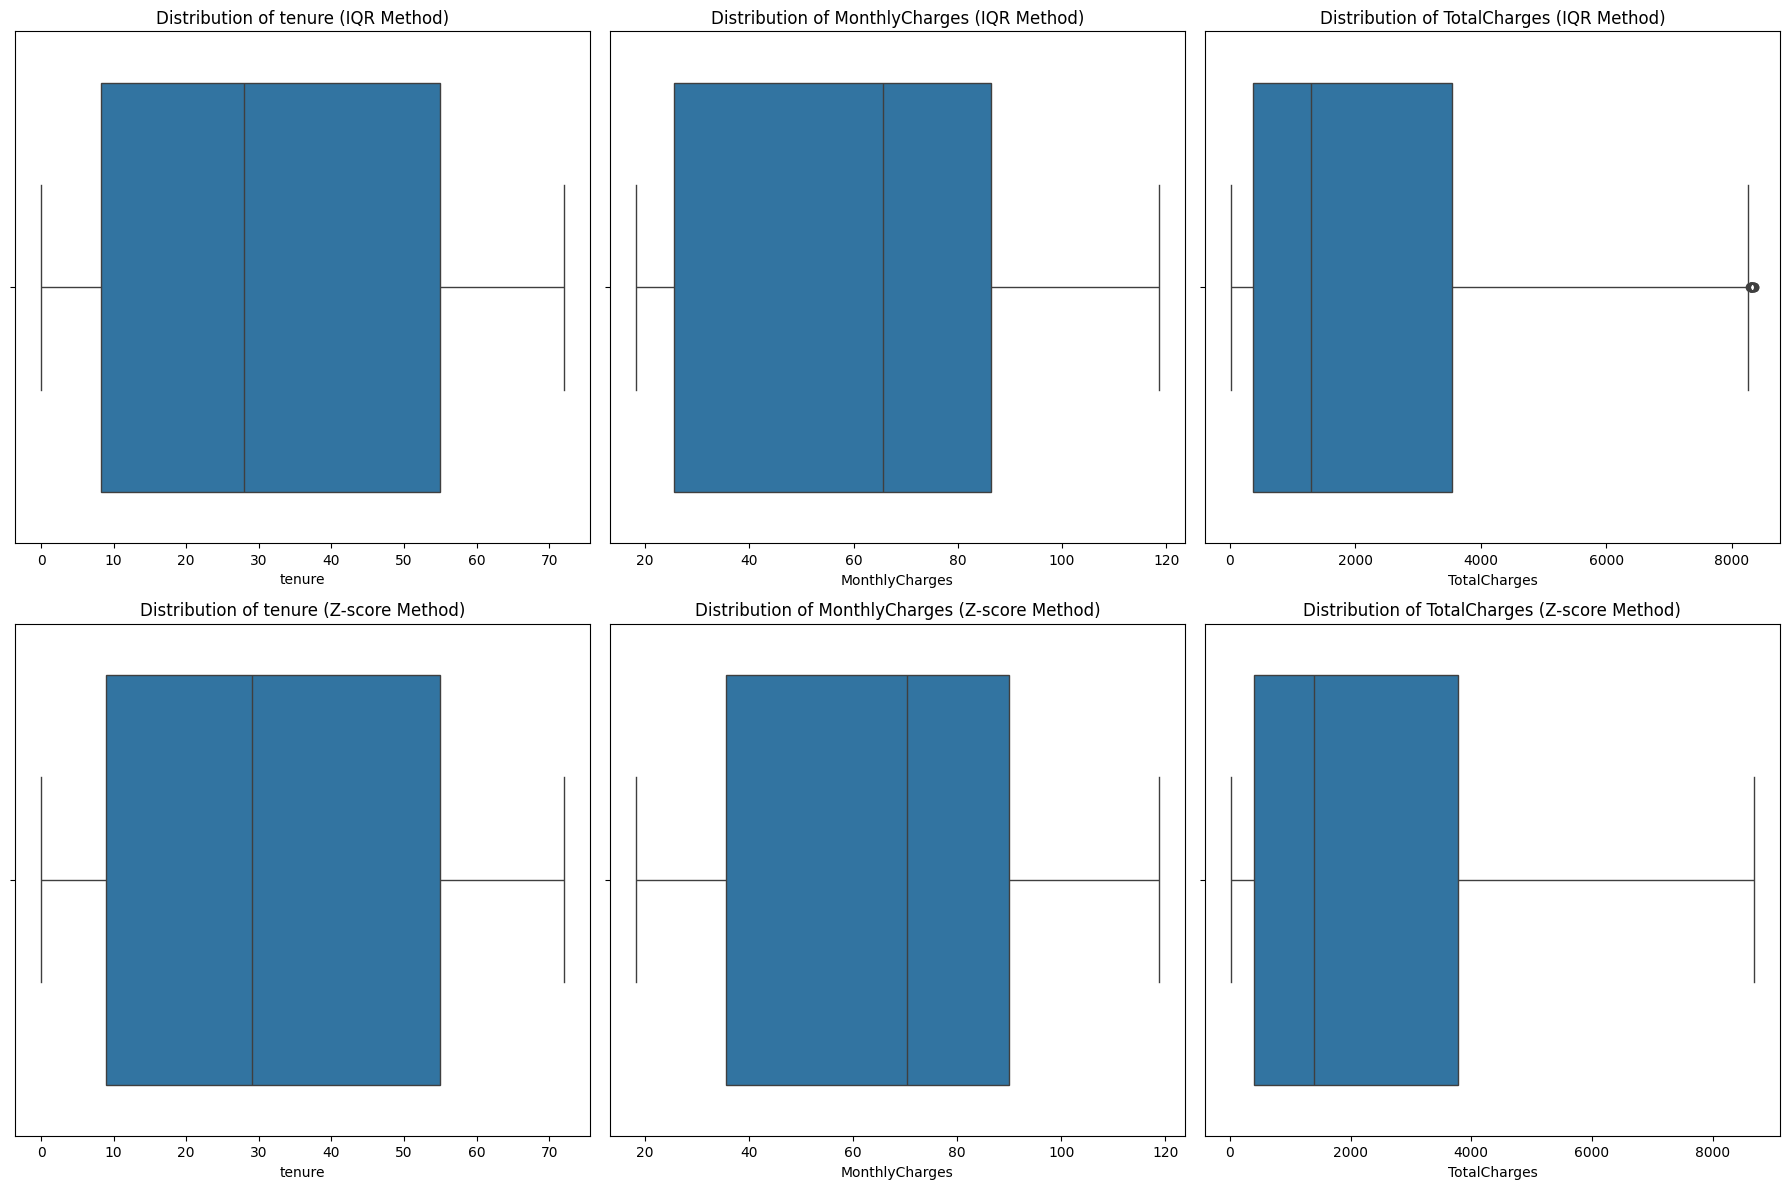

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(18, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns), i)
    sns.boxplot(x=df_iqr[column])
    plt.title(f'Distribution of {column} (IQR Method)')
    
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns), i + len(numerical_columns))
    sns.boxplot(x=df_zscore[column])
    plt.title(f'Distribution of {column} (Z-score Method)')

plt.tight_layout()
plt.show()


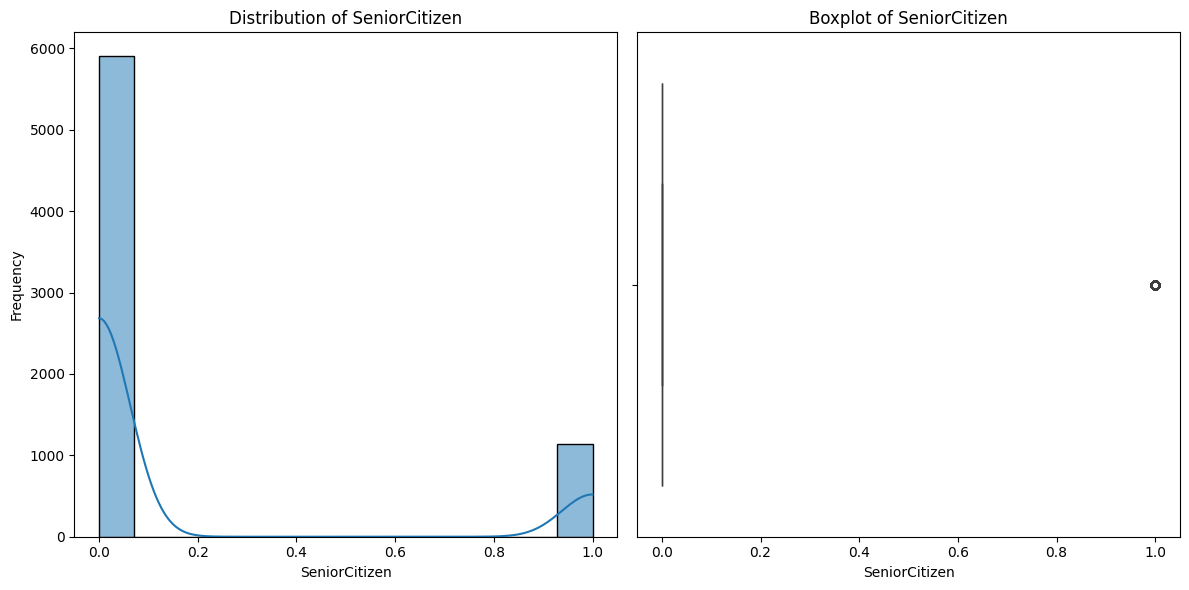

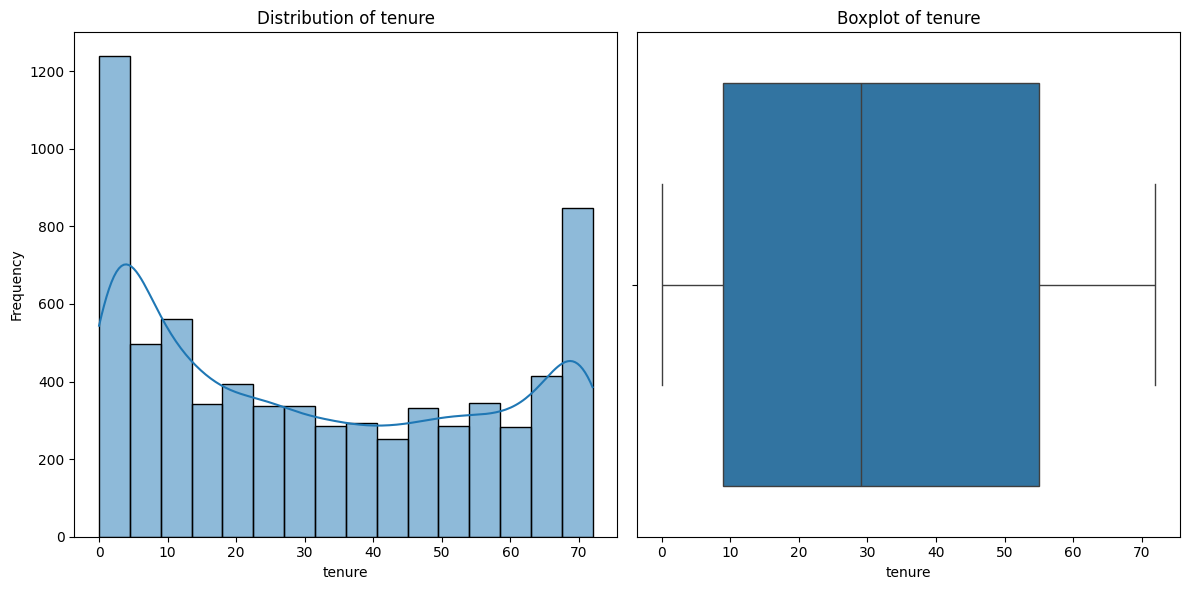

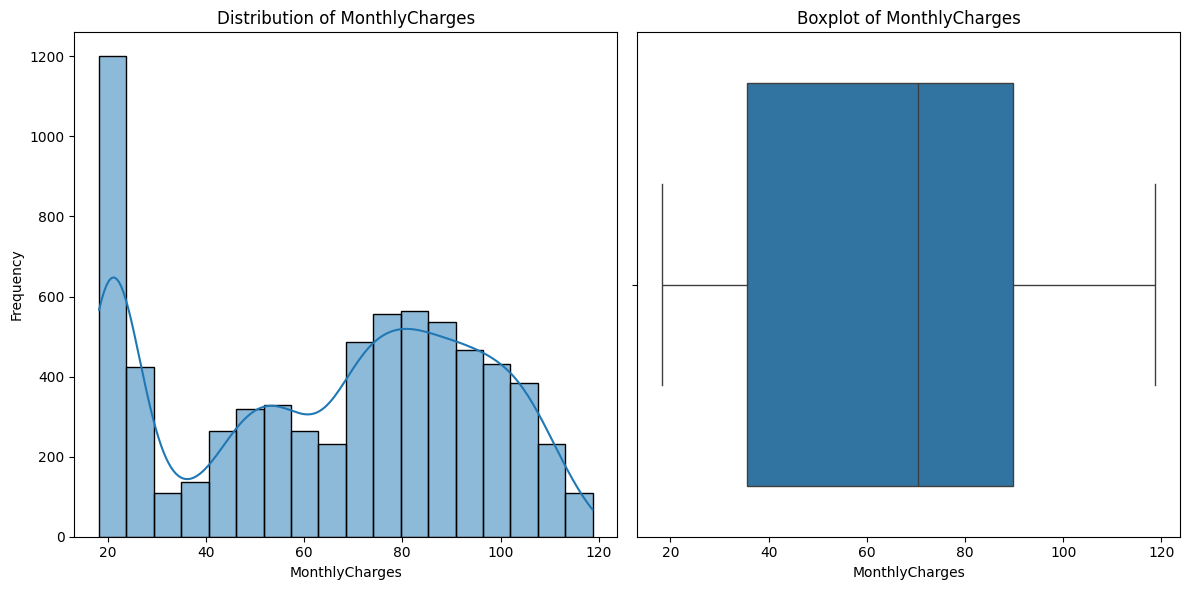

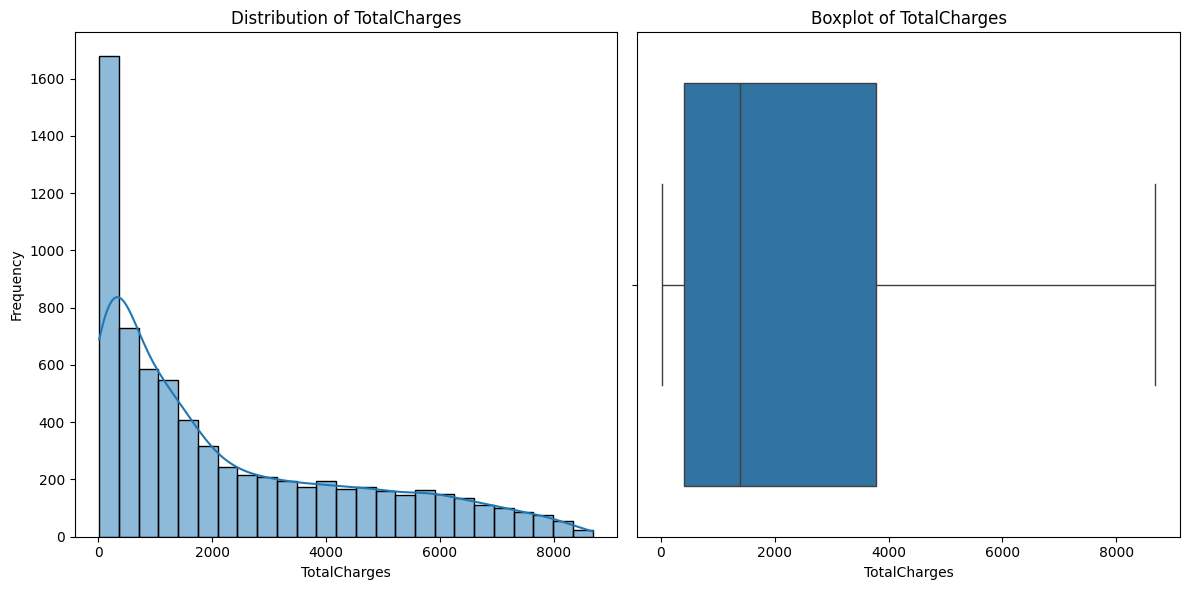

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your cleaned dataset

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms and boxplots for numerical variables
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()


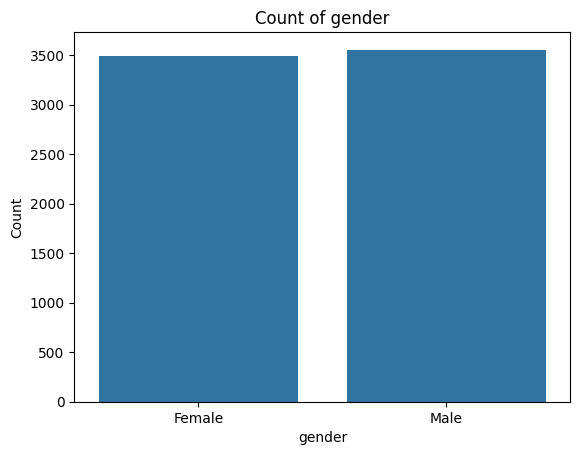

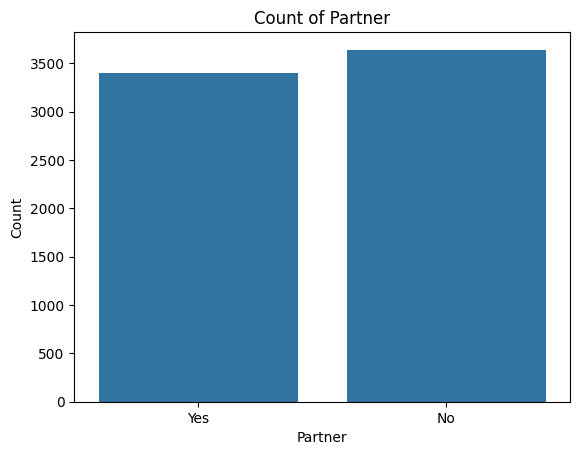

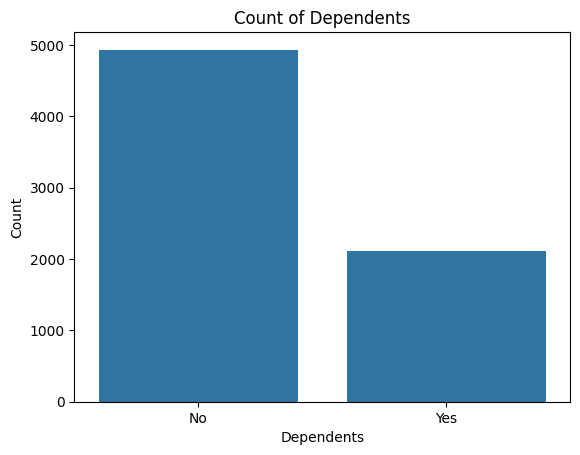

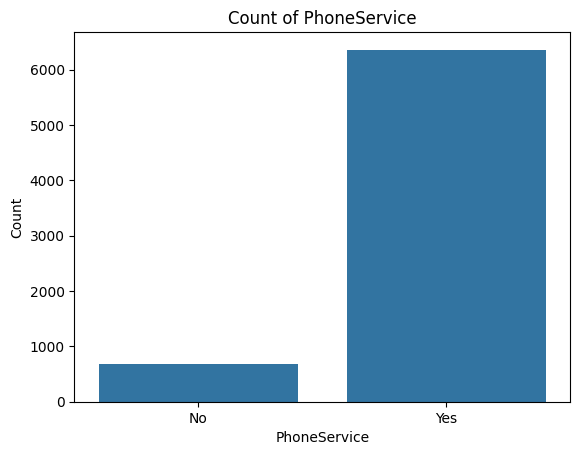

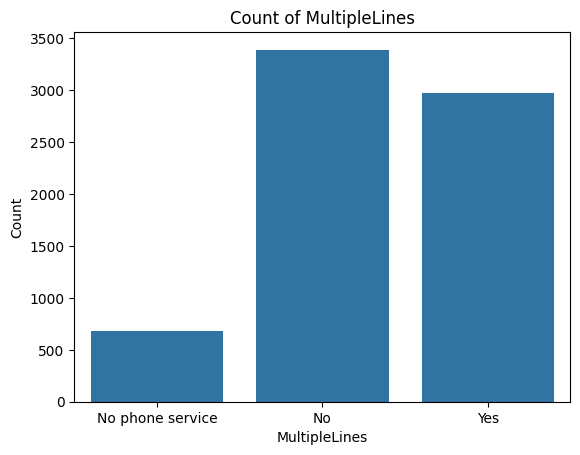

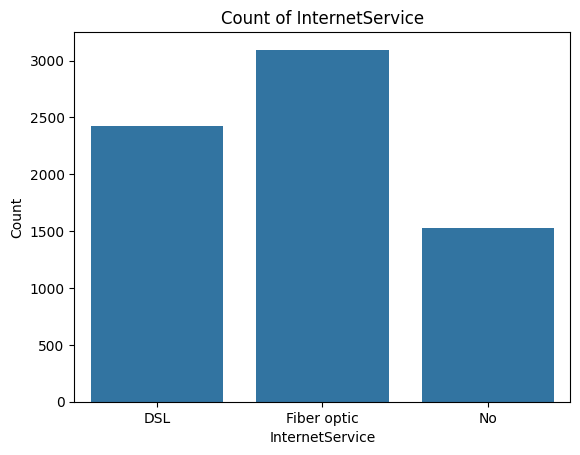

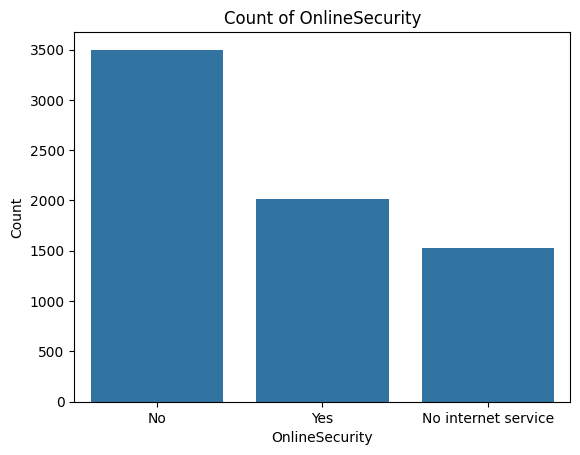

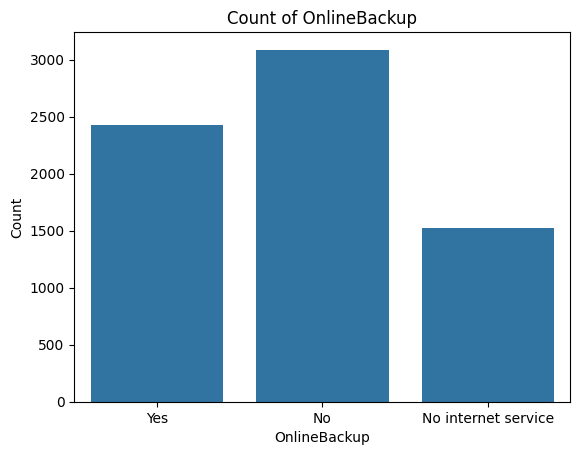

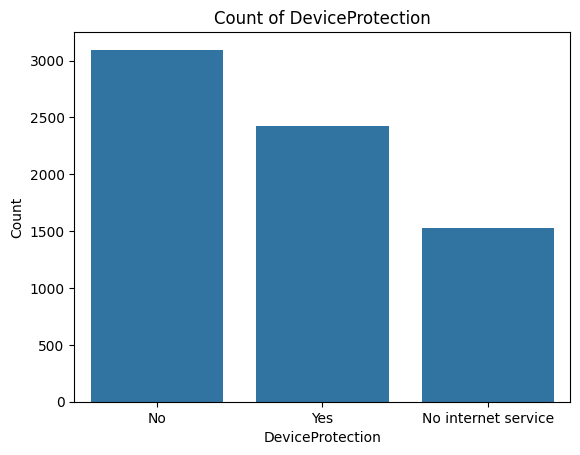

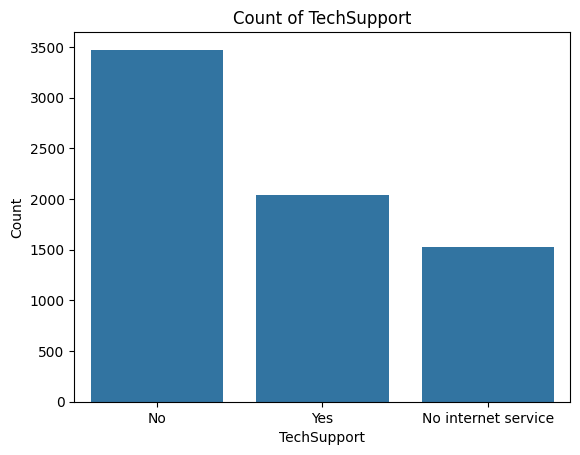

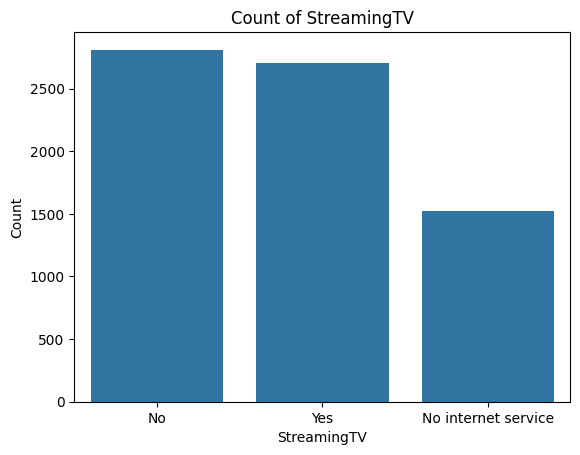

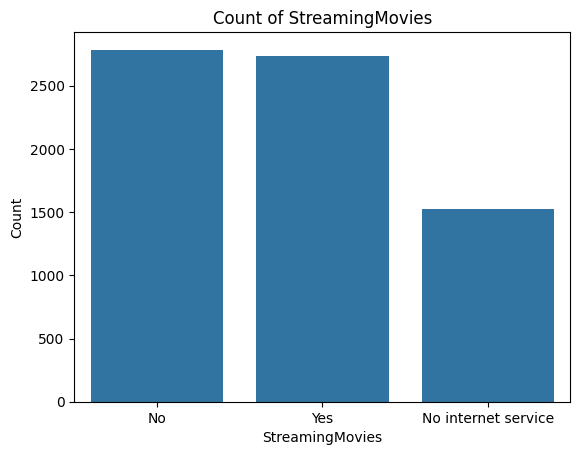

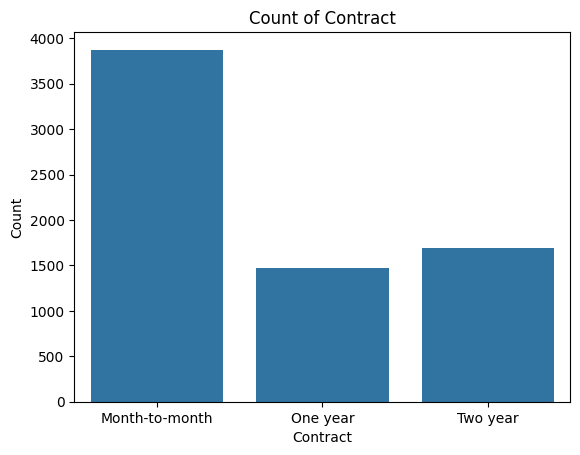

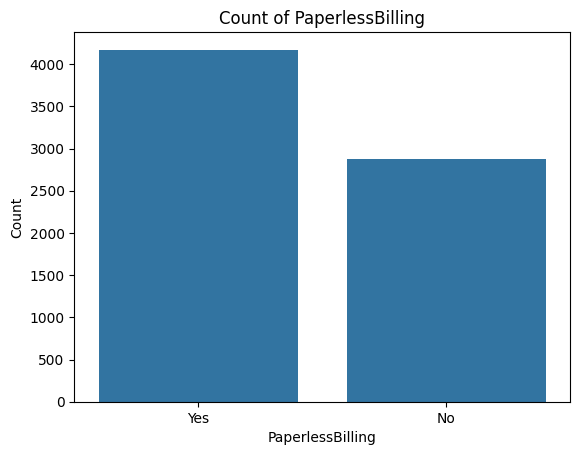

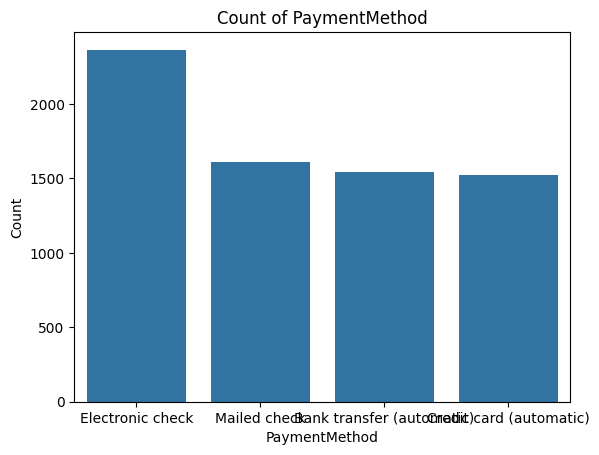

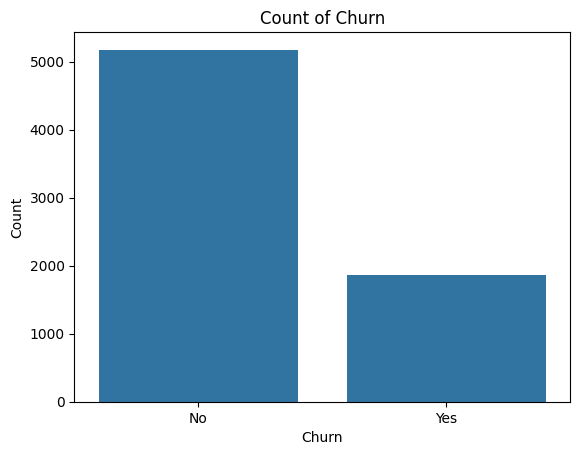

In [56]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot count plots for categorical variables
for column in categorical_columns:
    if column != "customerID":
        
        sns.countplot(x=df[column])
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()


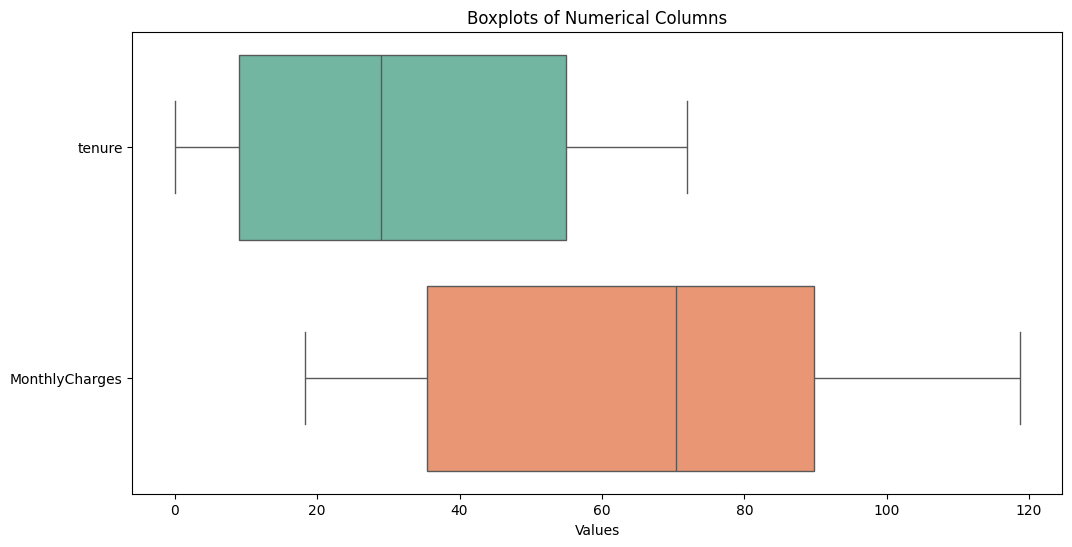

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.read_csv("curn.csv")
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Step 4: Create boxplots using matplotlib or seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if necessary

# Using seaborn for better aesthetics
sns.boxplot(data=df1[numerical_columns], orient='h', palette='Set2')
plt.title('Boxplots of Numerical Columns')
plt.xlabel('Values')
plt.show()


Number of outliers in tenure: 0
Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0


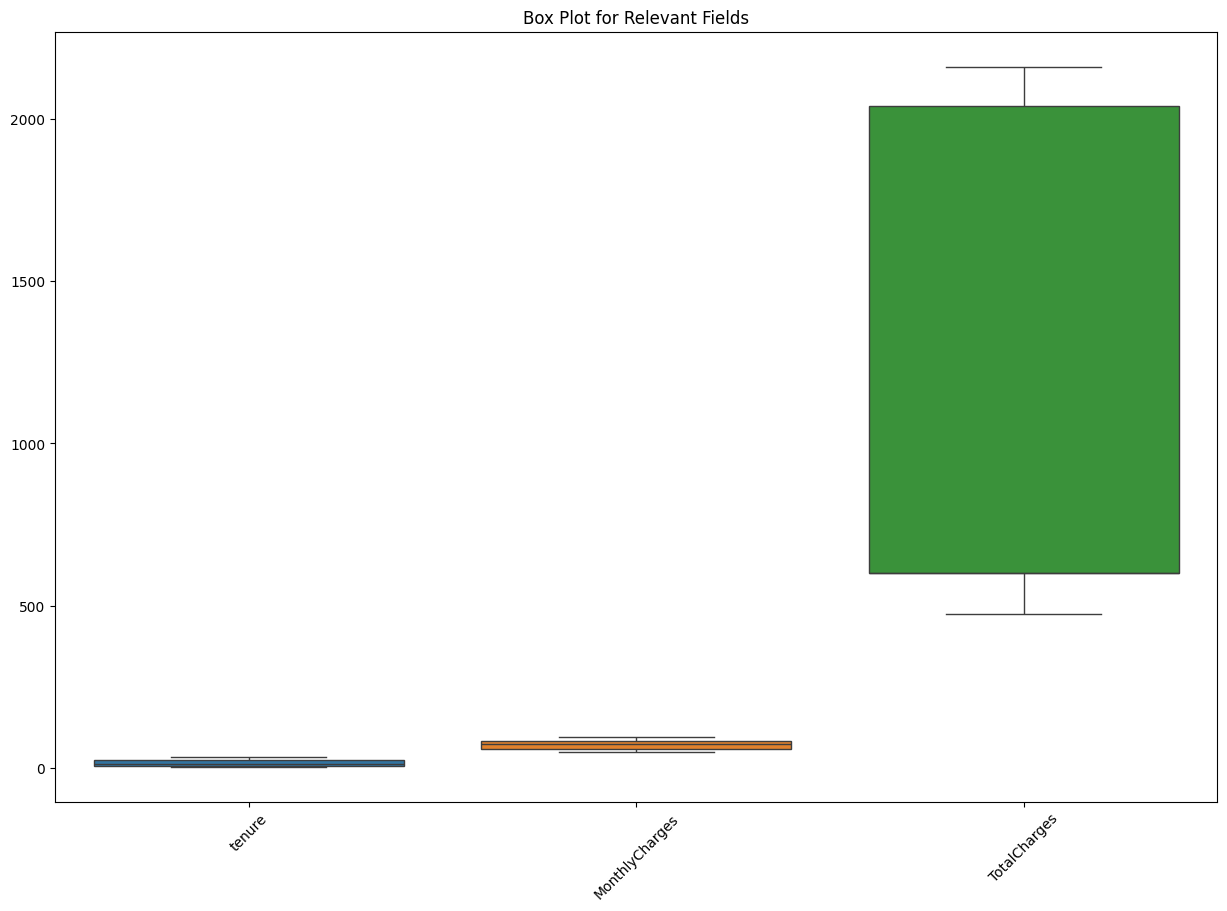

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset (replace this with your actual dataset loading code)
data = {
    'customerID': ['C001', 'C002', 'C003', 'C004', 'C005'],
    'tenure': [12, 24, 8, 36, 5],
    'MonthlyCharges': [50, 85, 75, 60, 95],
    'TotalCharges': [600, 2040, 600, 2160, 475]
}
df = pd.DataFrame(data)

# Relevant columns for analysis
relevant_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Convert relevant columns to numeric (if necessary)
df[relevant_columns] = df[relevant_columns].apply(pd.to_numeric, errors='coerce')

# Calculate outliers using IQR method
outlier_counts = {}

for col in relevant_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outlier_counts[col] = outliers.shape[0]

# Plot boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[relevant_columns])
plt.xticks(rotation=45)
plt.title('Box Plot for Relevant Fields')

# Display outlier counts
for col, count in outlier_counts.items():
    print(f'Number of outliers in {col}: {count}')

plt.show()


In [7]:
def remove_outliers(df, columns):
    for col in columns:
        # Convert column to numeric (ignore errors to handle non-numeric entries)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Calculate quartiles and IQR after converting to numeric
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Filter out outliers based on IQR range
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
    return df

# Example usage
df_cleaned = remove_outliers(df1, relevant_columns)


In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
